In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob 
import ast

def str_to_list(s):
    return ast.literal_eval(s)

In [170]:
## Read specific files from the directory
F = []
N = []

string = ['parts_removed1_m2', 'parts_removed10_m2', 'parts_removed100_m2', 'parts_removed1000_m2', 'parts_removed10000_m2']
for i in string:
    files_name =  r'/home/robert/Dropbox/data/*%s*.txt' %i
    files = glob.glob(files_name)
    print(files_name)

    ## Create dataframe from files
    li = []
    for file in files:
        df = pd.read_csv(file, delimiter='\t', dtype={'rodsRemoved': object})
        li.append(df)

    df = pd.concat(li, axis=0, ignore_index=True)
    df['rodsRemoved'] = df['rodsRemoved'].apply(str_to_list)

    #display(df)

    force = np.array(df['force'])
    force = np.unique(force)
    numParts = []
    ts = 1
    fn = '/home/robert/Dropbox/data/rods_removed%d' %ts

    with open(fn, 'w') as f:
        for value_to_check in force:

            # get the index of rows that have the value in column 'force'
            matching_indexes = df.index[df['force'] == value_to_check].tolist()
            sum_of_column_numParts = sum(df.loc[matching_indexes, 'numParts'])
            numParts.append(sum_of_column_numParts/len(matching_indexes))


            s = df.loc[matching_indexes, 'rodsRemoved']
            s = [item for subset in s.values for item in subset]
            for item in s:
                #print(item)
                
                f.write("%d\n" %len(item))

            #print(s)

            #strings = [i.replace("[","").replace("]","") for i in s.values if(i.replace("[]","") != "")]
            #strings = [int(i) if(',' not in i) else i.split(",") for i in strings]
            #print(strings)
            

    #print(force)
    #print(numParts)
    F.append(force)
    N.append(numParts)



/home/robert/Dropbox/data/*parts_removed1_m2*.txt
/home/robert/Dropbox/data/*parts_removed10_m2*.txt
/home/robert/Dropbox/data/*parts_removed100_m2*.txt
/home/robert/Dropbox/data/*parts_removed1000_m2*.txt
/home/robert/Dropbox/data/*parts_removed10000_m2*.txt


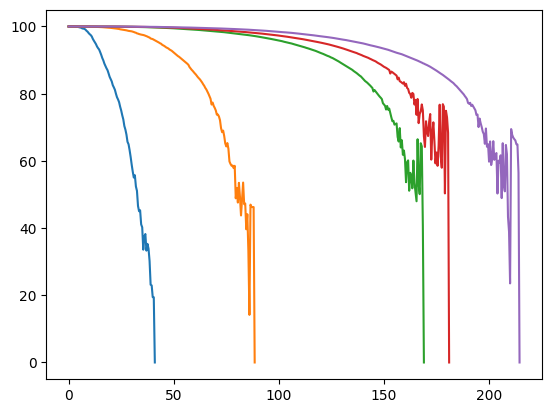

In [172]:
for i in range(len(F)):
    plt.plot(F[i],N[i])
    #plt.xlim(0,200)

plt.show()

In [19]:
# Create an empty dataframe to store the results
result_df = pd.DataFrame()

# Loop over each file in the list

for file_name in files:
    # Read the file into a dataframe
    df = pd.read_csv(file_name, header=None, names=['force', 'numParts', 'rodsRemoved'])
    print(df)
    # Add the dataframe to the result dataframe
    result_df = result_df.append(df, ignore_index=True)

ParserError: Error tokenizing data. C error: Expected 3 fields in line 35, saw 51


In [ ]:
l = i for i in list 